### Question 1)
Read the given dataset as a dataframe and check for missing values

In [187]:
# solution code
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate

df = pd.read_csv("jewel.csv")
df.isna().sum()



carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

### Question 2)
Create line plots for 'y', 'z', 'depth', and 'table' attributes versus price separately in order to check for potential outliers.

<AxesSubplot:xlabel='table'>

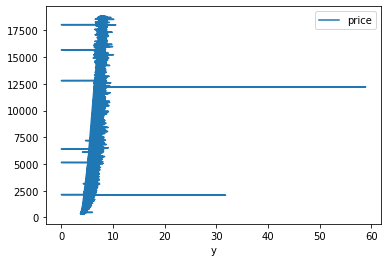

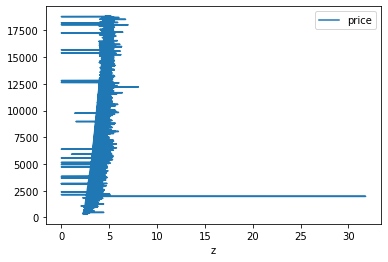

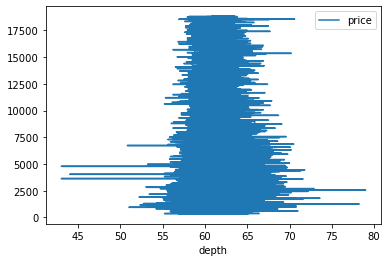

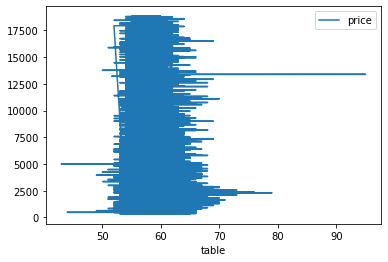

In [188]:
# solution code

df.plot.line(x="y",y="price")

df.plot.line(x="z",y="price")

df.plot.line(x="depth",y="price")

df.plot.line(x="table",y="price")



### Question 3)

Find and remove outliers by analyzing the above output of question 2. Explain your outlier detection process.

<AxesSubplot:xlabel='table'>

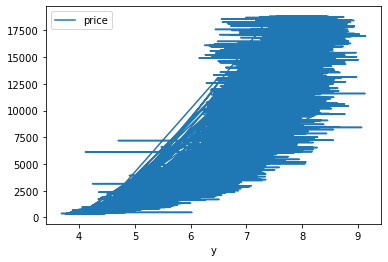

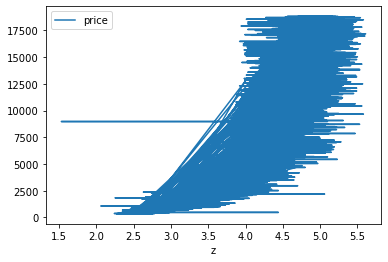

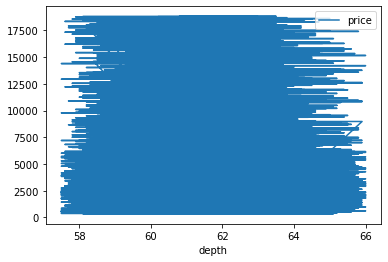

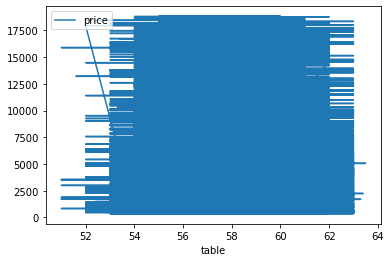

In [189]:
# solution code
def remove_outliers(df,columns):
    for col in columns:
        mean = df[col].mean()
        #Calculated the mean of column
        sd = df[col].std()
        #Calculated the standard deviation
        
        df = df[(df[col] <= mean+(3*sd))&(df[col] >= mean-(3*sd))]
        #Removed the data which are 3 standard deviations away from mean value 

    return df


df = remove_outliers(df,['y', 'z', 'depth','table'])
#called the outlier remover function



df.plot.line(x="y",y="price")

df.plot.line(x="z",y="price")

df.plot.line(x="depth",y="price")

df.plot.line(x="table",y="price")

#Got rid of most outliers except 1 in z but since it is in 3 standard deviations distance it is ok

### Question 4)
Replace ordinal values (cut, color, clarity) according to rules below:
- For "cut": 'Good':1, 'Very Good':2, 'Fair':3, 'Ideal':4, 'Premium':5
- For "color": 'J':1, 'I':2, 'H':3, 'G':4, 'F':5, 'E':6, 'D':7
- For "clarity": 'I1':1, 'SI1':2, 'SI2':3, 'VS1':4, 'VS2':5, 'VVS1':6, 'VVS2':7, 'IF':8

In [190]:
# solution code
df["cut"].replace(['Good', 'Very Good','Fair', 'Ideal', 'Premium'],[1,2,3,4,5],inplace=True)
df["color"].replace(['J', 'I', 'H', 'G', 'F', 'E', 'D'],[1,2,3,4,5,6,7],inplace=True)
df["clarity"].replace([ 'I1', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2', 'IF'],[1,2,3,4,5,6,7,8],inplace=True)

### Question 5)
Create bar graphs for 'cut', 'color', and 'clarity' attributes with their new values to analyze the dataset visually.


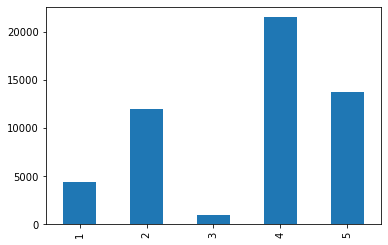

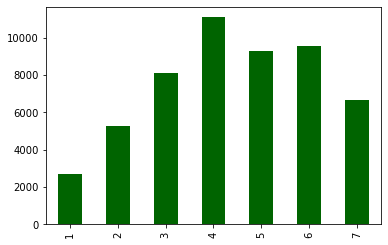

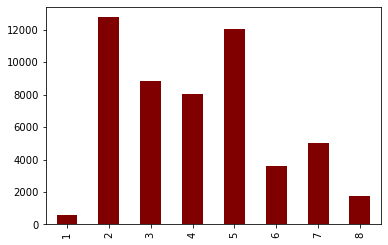

In [191]:
# solution code
x = df["cut"].value_counts().sort_index().plot.bar(x="cut")
plt.show()
y= df["color"].value_counts().sort_index().plot.bar(color="darkgreen")
plt.show()
z = df["clarity"].value_counts().sort_index().plot.bar(color="maroon")
plt.show()


### Question 6)
Shuffle the data points and split the dataset into training and testing set, with a 0.7-0.3 ratio (training set will be %70, and test set will be %30 of the dataset) (Write your own shuffling and spliting code here, do not use predefined function train_test_split).



In [192]:
# solution code
df = df.sample(frac = 1)
#Shuffled the data set

seventyPer = int(df.shape[0]/10*7)

train_data = df.iloc[:seventyPer,:]
x_train = train_data.drop(columns="price")
y_train = train_data["price"]

test_data = df.iloc[seventyPer:,:]
x_test = test_data.drop(columns="price")
y_test = test_data["price"]

### Question 7)

Create an instance of kNN with a number of neighbors between 1-30, then fit kNN regression model to train data. Then, make prediction and calculate mean squared error (MSE). Calculate MSE for k value between 1-30 and print them. Finally, create elbow function to find best k value and plot the elbow curve. Explain how you find the best k-value.

5


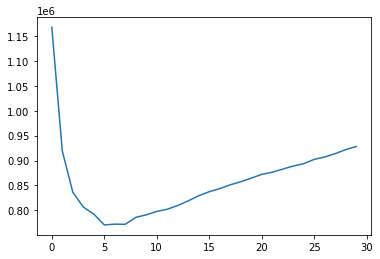

In [193]:
# solution code
mseValuesForK = {}
for i in range(30):
    knnModel = KNeighborsRegressor(n_neighbors=i+1)
    knnModel.fit(x_train, y_train)
    trainPredictions = knnModel.predict(x_test)
    mse = mean_squared_error(y_test, trainPredictions)
    mseValuesForK[i] = mse
#So we trained the model with x_train,y_train data.
#Hold k values with their mse's
plt.plot(mseValuesForK.keys(),mseValuesForK.values())
#Plot graph of K versus mse. From the graph we can see that the best k value lies between 5-10
minMse = min(mseValuesForK.values())
for k in mseValuesForK:
    if mseValuesForK[k]==minMse:
        minK = k
        break
#Hold the minMse value and its corresponding K. I will use this K in model
print(minK)


### Question 8)

Run 10-Fold Cross validation (CV) and print accuracy values for each run of CV. Also print the final average accuracy of the model.

In [194]:
# solution code
knnModel = KNeighborsRegressor(n_neighbors=minK)
accuracy = cross_validate(estimator=knnModel,X=x_train,y=y_train,cv=10)

mean =0
for i in accuracy["test_score"]:
    print("Accuracy of run: ",i)
    mean+=i
mean= mean/10
print("\nAverage of 10 run: ",mean)


Accuracy of run:  0.9486393790671472
Accuracy of run:  0.9456773769025839
Accuracy of run:  0.9497067503094583
Accuracy of run:  0.9506829943512889
Accuracy of run:  0.9452893984080513
Accuracy of run:  0.9482746399124328
Accuracy of run:  0.951389481447082
Accuracy of run:  0.9497270981248337
Accuracy of run:  0.9507558691264646
Accuracy of run:  0.9470057909230288

Average of 10 run:  0.9487148778572372


### Question 9)

Predict the price of new jewel data with the following custom features. 

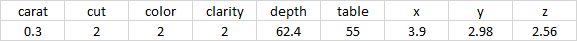

In [196]:
# solution code

knnModel = KNeighborsRegressor(n_neighbors=8)
knnModel.fit(x_train,y_train)

predictSet = pd.DataFrame({"carat":0.3,"cut":2,"color":2,"clarity":2,"depth":62.4,"table":55,"x":3.9,"y":2.98,"z":2.56},index=[0])

print("My models prediction is:\t",knnModel.predict(predictSet)[0])

My models prediction is:	 458.75
